   Unnamed: 0  Unnamed: 1  Unnamed: 2 Nome e sobrenome  \
0         NaN         NaN         NaN     italo belini   
1         NaN         NaN         NaN  Lorena de Souza   
2         NaN         NaN         NaN   Paola Biscaro    
3         NaN         NaN         NaN    Lucas Hygidio   
4         NaN         NaN         NaN        José Neto   

                                              Filmes  
0  Vingadores, Velozes e furiosos, Os incríveis, ...  
1  Avatar, Truque de mestre, Madagascar, Shrek, C...  
2  Madagascar, Shrek, Carros, Enrolados, Detona r...  
3  Vingadores, Velozes e furiosos, Oppenheimer, C...  
4  Avatar, Tropa de elite, Cidade de Deus, Madaga...  
Matriz de Incidência dos Alunos:
                                                 italo belini  \
italo belini                                                0   
Lorena de Souza                                             1   
Paola Biscaro                                               1   
Lucas Hygidio               

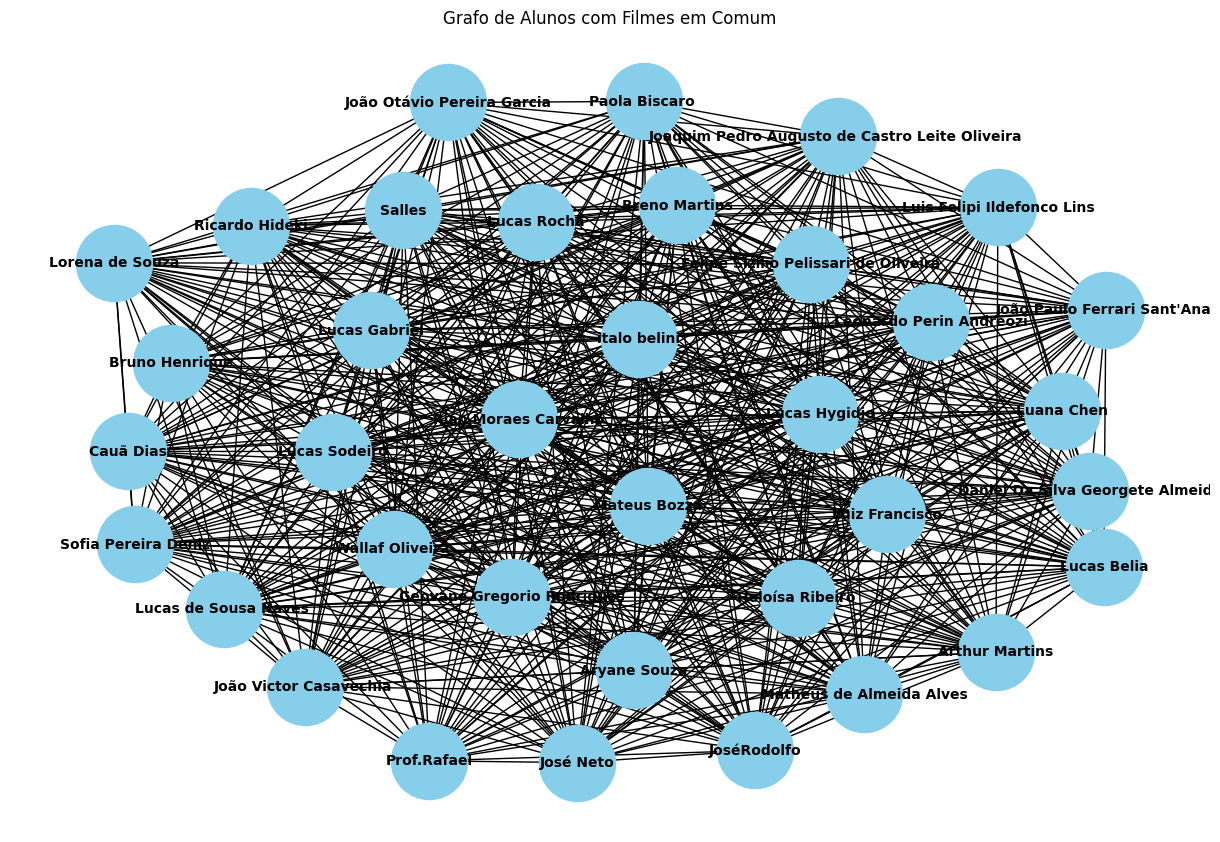

Matriz de Incidência dos Filmes:
                          Vingadores  Velozes e furiosos  Os incríveis  \
Vingadores                         0                   1             1   
Velozes e furiosos                 1                   0             1   
Os incríveis                       1                   1             0   
Bela e a fera                      1                   1             1   
Enrolados                          1                   1             1   
...                              ...                 ...           ...   
50 tons de cinza                   0                   0             0   
Simplesmente acontece              0                   0             0   
Garfield                           1                   1             0   
E. T. — O Extraterrestre           1                   0             1   
As apimentadas                     0                   0             0   

                          Bela e a fera  Enrolados  Monstros SA  Detona ralph 

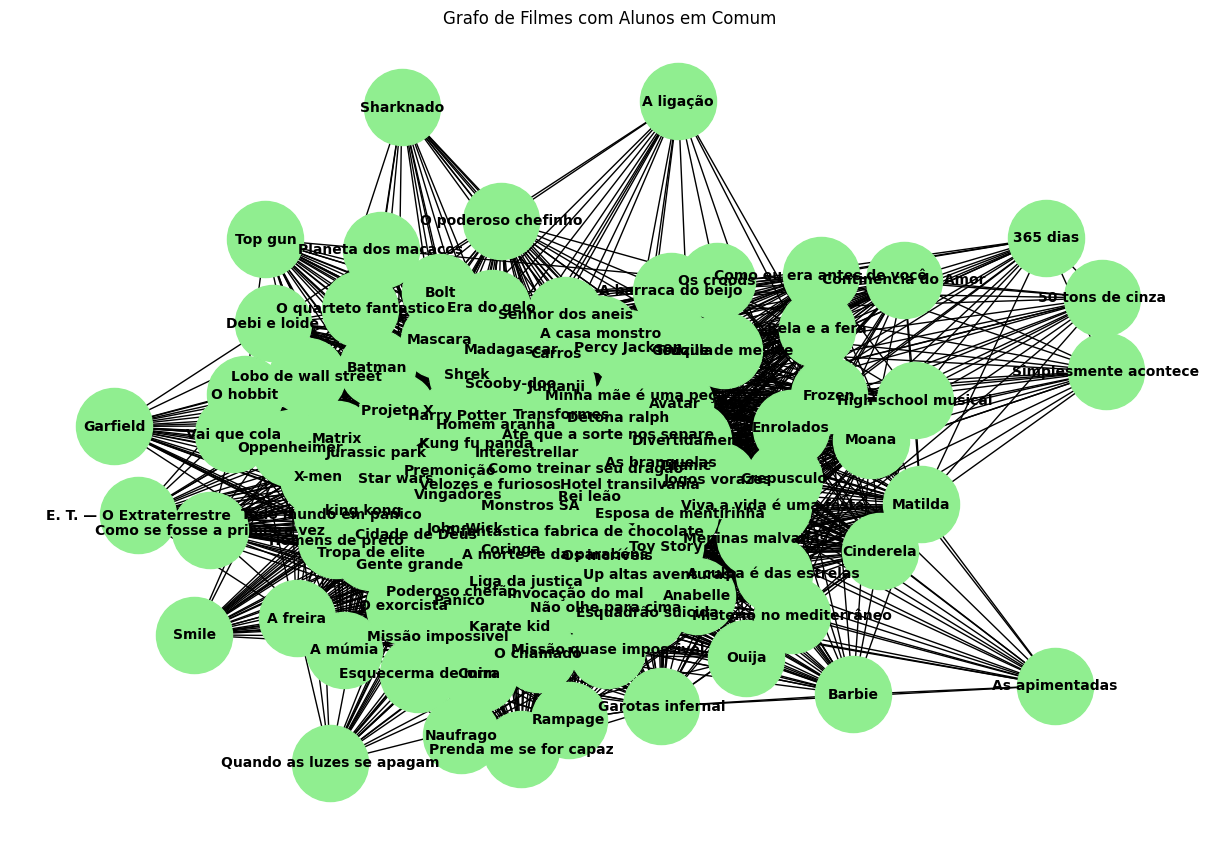

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Caminho do arquivo Excel
caminho_arquivo_excel = r"Dados_grafosXLSX.xlsx"

# Carregar dados do Excel
dataframe = pd.read_excel(caminho_arquivo_excel, engine='openpyxl')

# Verificar as primeiras linhas do dataframe para entender a estrutura
print(dataframe.head())

# Nome da coluna com os nomes dos alunos
coluna_alunos = 'Nome e sobrenome'
# Nome da coluna com os filmes
coluna_filmes = 'Filmes'

# Dividir os filmes em uma lista
dataframe[coluna_filmes] = dataframe[coluna_filmes].apply(lambda x: x.split(', '))

# Criar uma lista de todos os alunos
alunos = dataframe[coluna_alunos].unique()

# Criar a matriz de incidência dos alunos
num_alunos = len(alunos)
matriz_incidencia_alunos = np.zeros((num_alunos, num_alunos), dtype=int)

# Preencher a matriz de incidência dos alunos
for idx1, aluno1 in enumerate(alunos):
    filmes1 = set(dataframe[dataframe[coluna_alunos] == aluno1][coluna_filmes].explode())
    for idx2, aluno2 in enumerate(alunos):
        if idx1 != idx2:
            filmes2 = set(dataframe[dataframe[coluna_alunos] == aluno2][coluna_filmes].explode())
            if not filmes1.isdisjoint(filmes2):  # Se há filmes em comum
                matriz_incidencia_alunos[idx1, idx2] = 1

# Converter a matriz para um DataFrame para visualização
matriz_incidencia_alunos_df = pd.DataFrame(matriz_incidencia_alunos, index=alunos, columns=alunos)

# Exibir a matriz de incidência dos alunos
print("Matriz de Incidência dos Alunos:")
print(matriz_incidencia_alunos_df)

# Criar o grafo dos alunos
G_alunos = nx.Graph()

# Adicionar nós para alunos
G_alunos.add_nodes_from(alunos)

# Adicionar arestas
for idx1, aluno1 in enumerate(alunos):
    for idx2, aluno2 in enumerate(alunos):
        if matriz_incidencia_alunos[idx1, idx2] == 1:
            G_alunos.add_edge(aluno1, aluno2)

# Desenhar o grafo dos alunos
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_alunos)
nx.draw(G_alunos, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_color='black', font_weight='bold')
plt.title('Grafo de Alunos com Filmes em Comum')
plt.show()

# Criar uma lista de todos os filmes únicos
filmes = dataframe[coluna_filmes].explode().unique()

# Criar a matriz de incidência dos filmes
num_filmes = len(filmes)
matriz_incidencia_filmes = np.zeros((num_filmes, num_filmes), dtype=int)

# Preencher a matriz de incidência dos filmes
for idx1, filme1 in enumerate(filmes):
    alunos1 = set(dataframe[dataframe[coluna_filmes].apply(lambda x: filme1 in x)][coluna_alunos])
    for idx2, filme2 in enumerate(filmes):
        if idx1 != idx2:
            alunos2 = set(dataframe[dataframe[coluna_filmes].apply(lambda x: filme2 in x)][coluna_alunos])
            if not alunos1.isdisjoint(alunos2):  # Se há alunos em comum
                matriz_incidencia_filmes[idx1, idx2] = 1

# Converter a matriz para um DataFrame para visualização
matriz_incidencia_filmes_df = pd.DataFrame(matriz_incidencia_filmes, index=filmes, columns=filmes)

# Exibir a matriz de incidência dos filmes
print("Matriz de Incidência dos Filmes:")
print(matriz_incidencia_filmes_df)

# Criar o grafo dos filmes
G_filmes = nx.Graph()

# Adicionar nós para filmes
G_filmes.add_nodes_from(filmes)

# Adicionar arestas
for idx1, filme1 in enumerate(filmes):
    for idx2, filme2 in enumerate(filmes):
        if matriz_incidencia_filmes[idx1, idx2] == 1:
            G_filmes.add_edge(filme1, filme2)

# Desenhar o grafo dos filmes
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_filmes)
nx.draw(G_filmes, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=10, font_color='black', font_weight='bold')
plt.title('Grafo de Filmes com Alunos em Comum')
plt.show()